# Model Training and Setup



## This notebook will cover the process of setting up the Darknet framework, the training and testing of the model, and other details related to them

### Connecting to Google Drive 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

Access the folder where the project is going to be stored

In [3]:
%cd /mydrive/final-yolov4/

/content/gdrive/My Drive/final-yolov4


### Framework setup

Setting up the framework is required only the very first time when using this notebook. Afterwards, you can continue from the next section

Clone the repository


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Enable GPU and CuDNN usage in the Makefile (this can be manually edited in the file as well)

In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

Compile the Makefile (it may take a few minutes)

In [ ]:
!make

Give permission to execute to the files in darknet folder 

In [ ]:
%cd darknet
!chmod +x ./darknet

/content/gdrive/My Drive/final-yolov4/darknet


If you go back to the project folder/darknet/ on Google Drive, there will be numerous folders. The most important ones are cfg, data and backup. 

In the cfg folder there are multiple configurations available. In this project yolov4-custom.cfg and yolov4-tiny-custom.cfg will be used, and the rest of them can be removed (not mandatory).

In the data folder there are a few images and other files. These will be replaced with the .data and .names files, the images for training and testing (placed in a new folder called images), and the text files specifying the path to training and testing images. 

The backup folder will store the weights files. 

The structure for the mentioned directories is as follows:

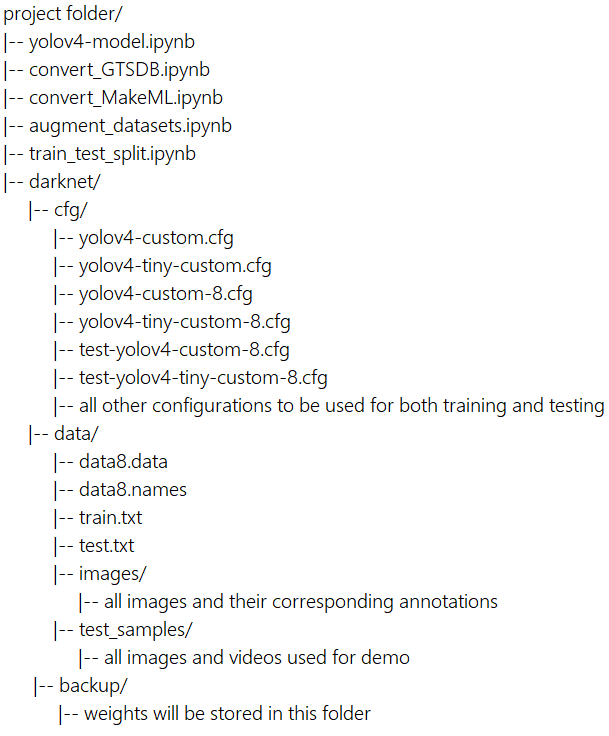

### Training the model (make sure that files .cfg and .data have the correct information)

If you have already set up the environment, after connecting to Google Drive, you can continue from here. Otherwise, omit this cell

In [4]:
%cd darknet
!chmod +x ./darknet

/content/gdrive/MyDrive/final-yolov4/darknet


Download the pretrained weights to be used in the training (~160 MB)

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

Download the pretrained weights for tiny YOLO (~20 MB)

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

Present some images from the dataset (not randomly, 3 images from each set with various objects)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

im = []
im.append(Image.open('data/images/00001.jpg'))
im.append(Image.open('data/images/00103.jpg'))
im.append(Image.open('data/images/00200.jpg'))
im.append(Image.open('data/images/road124.png'))
im.append(Image.open('data/images/road169.png'))
im.append(Image.open('data/images/road170.png'))
im.append(Image.open('data/images/img1.jpg'))
im.append(Image.open('data/images/img29.jpg'))
im.append(Image.open('data/images/img46.jpg'))
fig = plt.figure(figsize=(100,100))
for i in range(len(im)):
  fig.add_subplot(3, 3, i+1)
  plt.imshow(im[i])
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

Determine the anchors suitable for the dataset used (may take a few minutes). After getting the message "Saving anchors to the file: anchors.txt", the execution can be interrupted 

In [ ]:
!./darknet detector calc_anchors data/data8.data -num_of_clusters 9 -width 416 -height 416

Start the model training using the weights. It will automatically save the weights every 100 iterations. Using the version control of Google Drive, previous versions can be retrieved, as only the lastest version will be shown in the folder.  

-map flag can be used to calculate the mAP after reaching 1000 iterations (note it will make the process more time consuming)


In [ ]:
!./darknet detector train data/data8.data cfg/yolov4-custom-8-tuned.cfg yolov4.conv.137  -dont_show

The training can be interrupted at any give moment. It then can be continued from where it was left using the last saved weights (or other weights, just specify the path to them). 

In [ ]:
!./darknet detector train data/data8.data cfg/yolov4-custom-8-tuned.cfg backup/yolov4-custom-8-tuned_last.weights  -dont_show

The mAP can be determined for any weights using the following command. 

-iou_thresh flag allows to specify the minimum IoU to consider a detection as successful

results.txt represents the file where the information will be saved

In [ ]:
!./darknet detector map data/data8.data cfg/yolov4-custom-8-tuned.cfg weights_v5/yolov4-custom-8-tuned_1700ep.weights -iou_thresh 0.5 > results_v5_1700ep.txt

Run the trained model on a test image and see the result of the detection (saved by default as predictions.jpg in the project folder)

In [5]:
#specify the path to the test image
img_path = 'data/test_samples/test16.jpg'

In [7]:
!./darknet detector test data/data8.data cfg/test-yolov4-custom-8-tuned.cfg weights_v5/yolov4-custom-8-tuned_1700ep.weights {img_path} -dont-show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

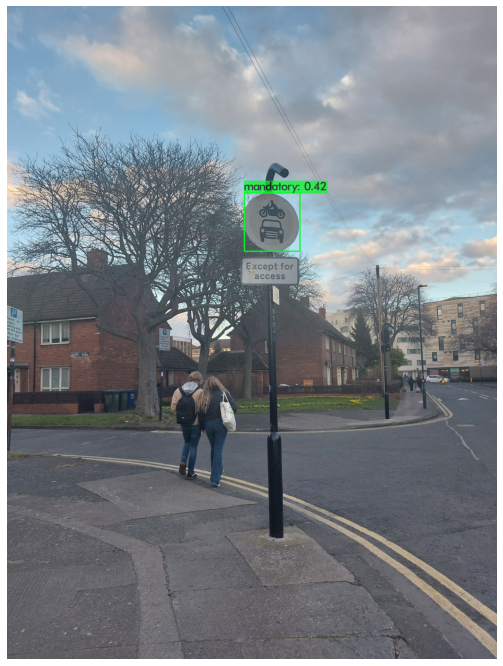

In [8]:
#display the image
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

Run the trained model on a test video and see the result of the detection

-dont_show flag will suppress the visual output in the console

-out_filename specifies the location and filename to save the detection video

In [9]:
!./darknet detector demo data/data8.data cfg/yolov4-custom-8-tuned.cfg weights_v5/yolov4-custom-8-tuned_1700ep.weights -dont_show data/test_samples/videotest.mp4 -i 0 -out_filename data/results5.avi

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 c